In [78]:
import numpy as np                              # import numpy
import pandas as pd
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf
import glob

In [79]:
all_files = glob.glob("climate*.csv")

print(all_files)

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data.shape

['climate_change.csv']


(308, 11)

In [80]:
data.shape

(308, 11)

In [81]:
cols = [0,1]
data.drop(data.columns[cols],axis=1,inplace=True)
data.columns.values[4] = "CFC11"
data.columns.values[5] = "CFC12"
data.columns.values[8] = "Temp"
data.head()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [82]:
#We need to normalize the dataset because values on each column have different ranges
from sklearn import preprocessing





In [83]:
y = data.Temp
y_backup = y
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = data.columns)

df.head()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,0.904012,0.119801,0.047208,0.000000,0.000000,0.000000,0.357812,0.573072,0.382958
1,0.820104,0.110697,0.020728,0.003729,0.009143,0.008957,0.367547,0.526387,0.391773
2,0.728214,0.082351,0.018069,0.006377,0.018635,0.018647,0.454420,0.483762,0.410382
3,0.596419,0.043037,0.007922,0.008754,0.028415,0.028498,0.525951,0.444520,0.448580
4,0.444996,0.000000,0.100440,0.012105,0.038269,0.037956,0.427173,0.407984,0.422135


In [84]:
x_np1 = df[['CO2']].values
y_np1 = df[['Temp']].values

distro = np.concatenate((x_np1, y_np1), axis=1)
print(distro)

cols = [8]
data.drop(data.columns[cols],axis=1,inplace=True)
data.head()


[[0.11980137 0.38295788]
 [0.11069729 0.39177277]
 [0.08235051 0.41038198]
 [0.04303745 0.44857982]
 [0.         0.42213516]
 [0.00268984 0.36728697]
 [0.02813987 0.50342801]
 [0.06000414 0.35259549]
 [0.0802814  0.36336925]
 [0.09517898 0.28893242]
 [0.10945582 0.32419197]
 [0.13656114 0.2575906 ]
 [0.15270019 0.33986288]
 [0.14090627 0.26052889]
 [0.11131802 0.25269344]
 [0.06269398 0.30950049]
 [0.02441548 0.3006856 ]
 [0.03124353 0.24191969]
 [0.05979723 0.15572968]
 [0.09042003 0.        ]
 [0.1051107  0.27522037]
 [0.12187047 0.12438786]
 [0.15497621 0.24485798]
 [0.16614939 0.23506366]
 [0.18104697 0.27717924]
 [0.17028761 0.22820764]
 [0.13428512 0.23506366]
 [0.09683426 0.28893242]
 [0.06269398 0.24191969]
 [0.06021105 0.26836435]
 [0.08752328 0.18511263]
 [0.11690461 0.27424094]
 [0.13180219 0.39471107]
 [0.14400993 0.33986288]
 [0.16304573 0.32419197]
 [0.19863439 0.32027424]
 [0.21435961 0.29872674]
 [0.20132423 0.33006856]
 [0.16428719 0.28011753]
 [0.12249121 0.27522037]


,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


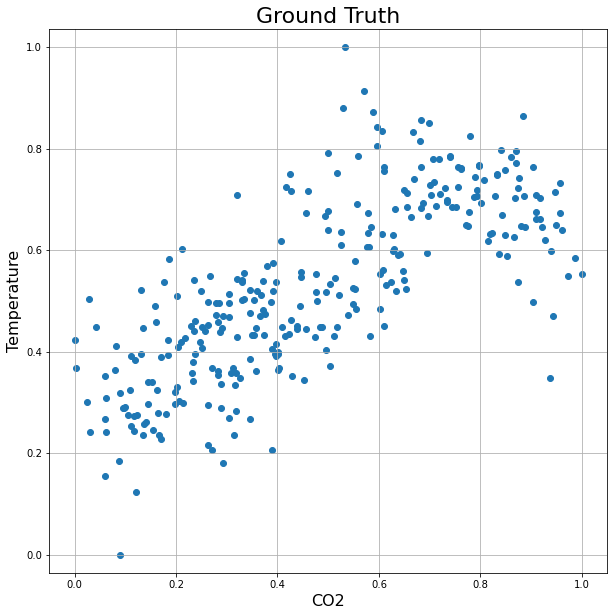

In [85]:
plt.figure(figsize=(10,10))                                 
plt.scatter(distro[:,0], distro[:,1], marker='o') 
plt.axis('equal')                                  
plt.xlabel('CO2', fontsize=16)              
plt.ylabel('Temperature', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

In [86]:
import random
m1 = random.choice(distro)
m2 = random.choice(distro)
cov1 = np.cov(np.transpose(distro))
cov2 = np.cov(np.transpose(distro))
pi = 0.5

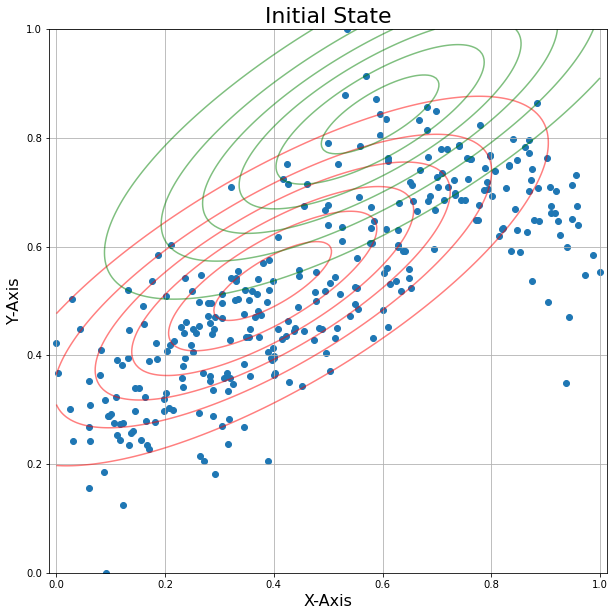

In [87]:
x1 = np.linspace(0,1,200)  
x2 = np.linspace(-0,1,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(distro[:,0], distro[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()


In [88]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(distro, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(distro, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [89]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(distro)):
        num_mu1 += (1-eval1[i]) * distro[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * distro[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(distro)):

        q1 = np.matrix(distro[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(distro[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(distro)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [90]:
#Function to plot the EM algo
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(distro[:,0], distro[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

Iteration 0: Mean Cluster 1:[0.45485024 0.49073623], Covariance 1: [[0.07065257 0.03324972]
 [0.03324972 0.02559817]], Mean Cluster 2:[0.58112286 0.70077349], Covariance 2:[[0.04389067 0.01705309]
 [0.01705309 0.0180544 ]], pi:0.1759600123962084


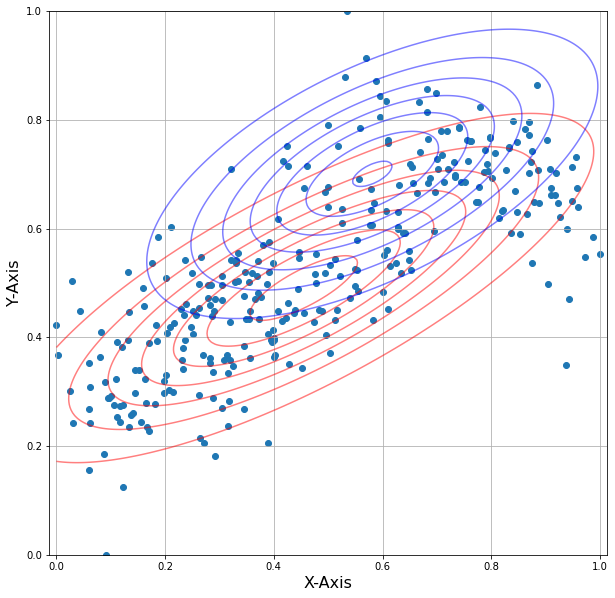

Iteration 1: Mean Cluster 1:[0.45260462 0.49021143], Covariance 1: [[0.07136307 0.03355989]
 [0.03355989 0.02566834]], Mean Cluster 2:[0.59315446 0.70555258], Covariance 2:[[0.03719422 0.01250022]
 [0.01250022 0.01608826]], pi:0.17406317843536803
Iteration 2: Mean Cluster 1:[0.44866896 0.48894077], Covariance 1: [[0.0709916  0.03318664]
 [0.03318664 0.02540817]], Mean Cluster 2:[0.61332472 0.71362242], Covariance 2:[[0.0326933  0.00871086]
 [0.00871086 0.01412527]], pi:0.17248235909567874
Iteration 3: Mean Cluster 1:[0.44308806 0.48690489], Covariance 1: [[0.06989191 0.03244733]
 [0.03244733 0.02498175]], Mean Cluster 2:[0.63944355 0.72260178], Covariance 2:[[0.02855307 0.00456611]
 [0.00456611 0.01189681]], pi:0.1730591456912015
Iteration 4: Mean Cluster 1:[0.43487841 0.48370401], Covariance 1: [[0.06776818 0.0313067 ]
 [0.0313067  0.02439088]], Mean Cluster 2:[0.67061049 0.72949104], Covariance 2:[[0.02486712 0.00015612]
 [0.00015612 0.00986092]], pi:0.17897762377102316
Iteration 5: 

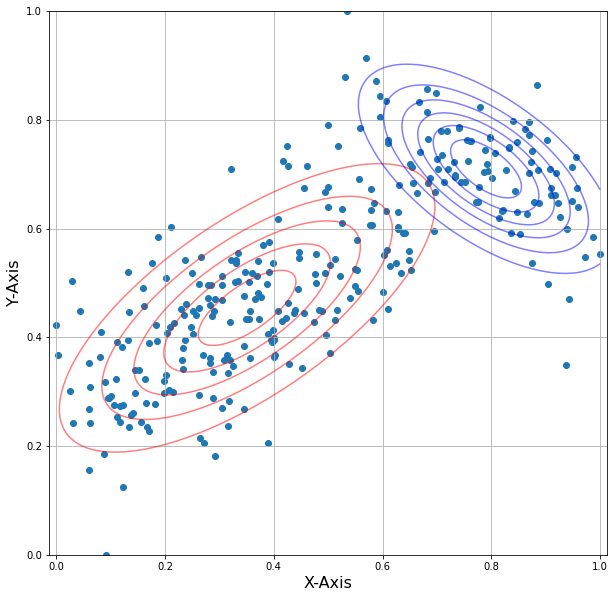

Iteration 11: Mean Cluster 1:[0.34833996 0.45297325], Covariance 1: [[0.03347783 0.01805728]
 [0.01805728 0.02012422]], Mean Cluster 2:[0.79153855 0.71022879], Covariance 2:[[ 0.01384064 -0.00710804]
 [-0.00710804  0.00946528]], pi:0.29045492747251767
Iteration 12: Mean Cluster 1:[0.34716311 0.45231344], Covariance 1: [[0.03300515 0.01777553]
 [0.01777553 0.01998243]], Mean Cluster 2:[0.79180276 0.71032573], Covariance 2:[[ 0.01371626 -0.00705689]
 [-0.00705689  0.00943378]], pi:0.29216031932316366
Iteration 13: Mean Cluster 1:[0.34655722 0.45193086], Covariance 1: [[0.03278446 0.01763367]
 [0.01763367 0.01990001]], Mean Cluster 2:[0.79175857 0.71037483], Covariance 2:[[ 0.01368286 -0.00703012]
 [-0.00703012  0.00941716]], pi:0.29315265078906516
Iteration 14: Mean Cluster 1:[0.34620855 0.45168699], Covariance 1: [[0.03267018 0.01755425]
 [0.01755425 0.01984755]], Mean Cluster 2:[0.79163363 0.71040197], Covariance 2:[[ 0.01368108 -0.00701474]
 [-0.00701474  0.0094073 ]], pi:0.2937881798

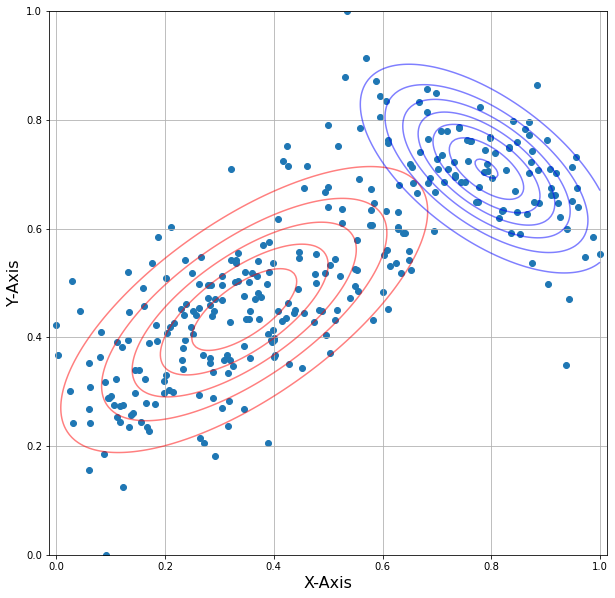

Iteration 21: Mean Cluster 1:[0.34550739 0.45113539], Covariance 1: [[0.03247338 0.01740075]
 [0.01740075 0.01972927]], Mean Cluster 2:[0.79112479 0.71045099], Covariance 2:[[ 0.01372358 -0.00698368]
 [-0.00698368  0.00938673]], pi:0.29523484018323476
Iteration 22: Mean Cluster 1:[0.34548221 0.4511147 ], Covariance 1: [[0.03246681 0.01739533]
 [0.01739533 0.01972485]], Mean Cluster 2:[0.79110269 0.71045254], Covariance 2:[[ 0.0137258  -0.00698255]
 [-0.00698255  0.00938598]], pi:0.29528931848417195
Iteration 23: Mean Cluster 1:[0.34546323 0.4510991 ], Covariance 1: [[0.03246185 0.01739126]
 [0.01739126 0.01972152]], Mean Cluster 2:[0.791086  0.7104537], Covariance 2:[[ 0.01372748 -0.00698169]
 [-0.00698169  0.00938542]], pi:0.2953303805086295
Iteration 24: Mean Cluster 1:[0.34544893 0.45108734], Covariance 1: [[0.03245813 0.01738819]
 [0.01738819 0.019719  ]], Mean Cluster 2:[0.79107341 0.71045456], Covariance 2:[[ 0.01372875 -0.00698105]
 [-0.00698105  0.00938499]], pi:0.2953613411036

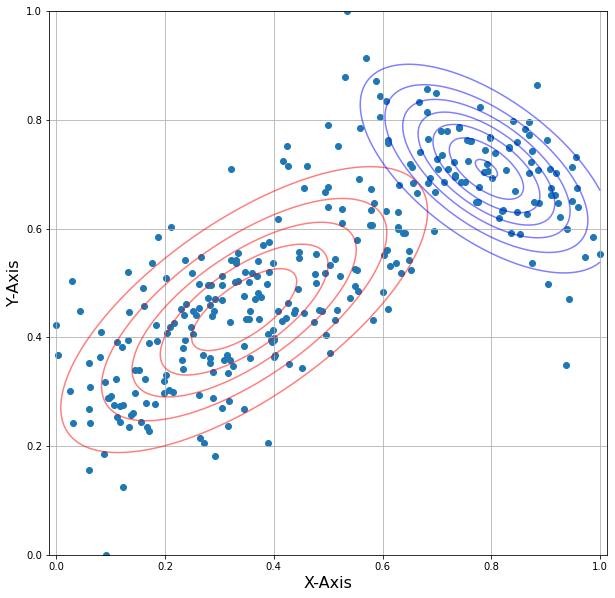

Iteration 31: Mean Cluster 1:[0.34541115 0.45105627], Covariance 1: [[0.03244828 0.01738008]
 [0.01738008 0.01971237]], Mean Cluster 2:[0.79104007 0.71045682], Covariance 2:[[ 0.01373212 -0.00697934]
 [-0.00697934  0.00938387]], pi:0.29544318081926196
Iteration 32: Mean Cluster 1:[0.34540965 0.45105503], Covariance 1: [[0.03244789 0.01737976]
 [0.01737976 0.0197121 ]], Mean Cluster 2:[0.79103875 0.71045691], Covariance 2:[[ 0.01373225 -0.00697927]
 [-0.00697927  0.00938383]], pi:0.2954464284314516
Iteration 33: Mean Cluster 1:[0.34540852 0.4510541 ], Covariance 1: [[0.03244759 0.01737952]
 [0.01737952 0.01971191]], Mean Cluster 2:[0.79103775 0.71045698], Covariance 2:[[ 0.01373235 -0.00697922]
 [-0.00697922  0.00938379]], pi:0.2954488788155882
Iteration 34: Mean Cluster 1:[0.34540766 0.4510534 ], Covariance 1: [[0.03244737 0.01737933]
 [0.01737933 0.01971176]], Mean Cluster 2:[0.791037   0.71045703], Covariance 2:[[ 0.01373243 -0.00697918]
 [-0.00697918  0.00938377]], pi:0.295450727697

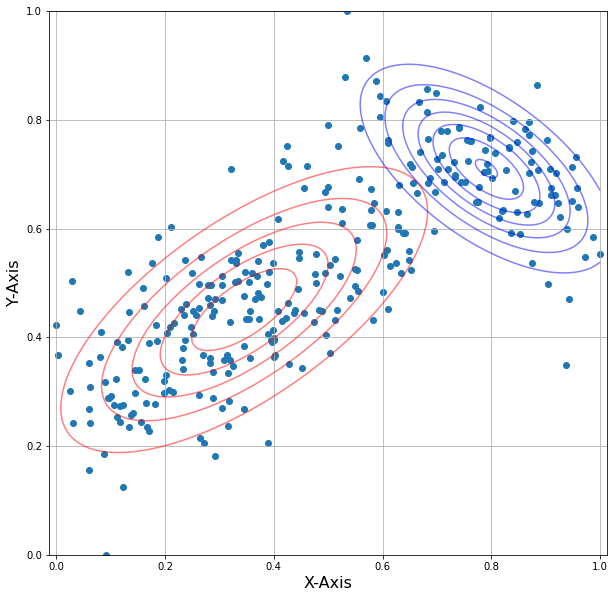

Iteration 41: Mean Cluster 1:[0.34540541 0.45105154], Covariance 1: [[0.03244678 0.01737885]
 [0.01737885 0.01971136]], Mean Cluster 2:[0.791035   0.71045716], Covariance 2:[[ 0.01373263 -0.00697908]
 [-0.00697908  0.0093837 ]], pi:0.2954556197520809
Iteration 42: Mean Cluster 1:[0.34540532 0.45105147], Covariance 1: [[0.03244676 0.01737883]
 [0.01737883 0.01971134]], Mean Cluster 2:[0.79103492 0.71045717], Covariance 2:[[ 0.01373264 -0.00697908]
 [-0.00697908  0.0093837 ]], pi:0.2954558140158084
Iteration 43: Mean Cluster 1:[0.34540525 0.45105141], Covariance 1: [[0.03244674 0.01737882]
 [0.01737882 0.01971133]], Mean Cluster 2:[0.79103486 0.71045717], Covariance 2:[[ 0.01373264 -0.00697907]
 [-0.00697907  0.0093837 ]], pi:0.29545596059797385
Iteration 44: Mean Cluster 1:[0.3454052  0.45105137], Covariance 1: [[0.03244673 0.0173788 ]
 [0.0173788  0.01971132]], Mean Cluster 2:[0.79103482 0.71045717], Covariance 2:[[ 0.01373265 -0.00697907]
 [-0.00697907  0.0093837 ]], pi:0.295456071201

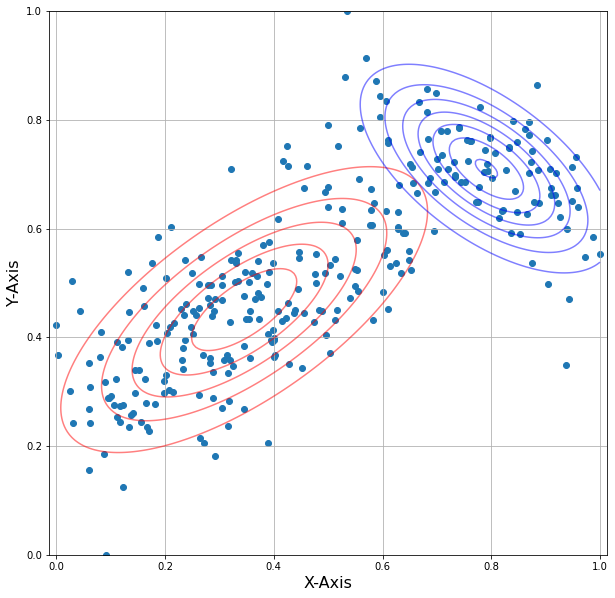

Iteration 51: Mean Cluster 1:[0.34540506 0.45105126], Covariance 1: [[0.03244669 0.01737878]
 [0.01737878 0.0197113 ]], Mean Cluster 2:[0.7910347  0.71045718], Covariance 2:[[ 0.01373266 -0.00697907]
 [-0.00697907  0.00938369]], pi:0.29545636387031116
Iteration 52: Mean Cluster 1:[0.34540506 0.45105126], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.7910347  0.71045718], Covariance 2:[[ 0.01373266 -0.00697907]
 [-0.00697907  0.00938369]], pi:0.295456375492648
Iteration 53: Mean Cluster 1:[0.34540505 0.45105125], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103469 0.71045718], Covariance 2:[[ 0.01373266 -0.00697907]
 [-0.00697907  0.00938369]], pi:0.2954563842623339
Iteration 54: Mean Cluster 1:[0.34540505 0.45105125], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103469 0.71045718], Covariance 2:[[ 0.01373266 -0.00697907]
 [-0.00697907  0.00938369]], pi:0.2954563908795

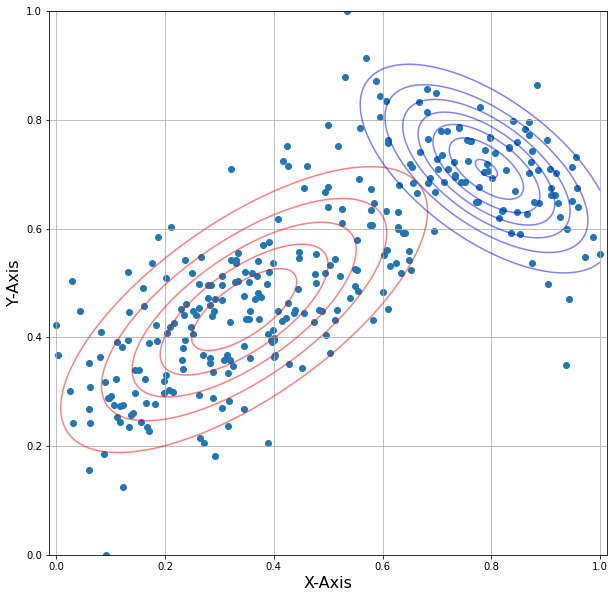

Iteration 61: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564083893265
Iteration 62: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.29545640908467036
Iteration 63: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.29545640960934527
Iteration 64: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.29545641000

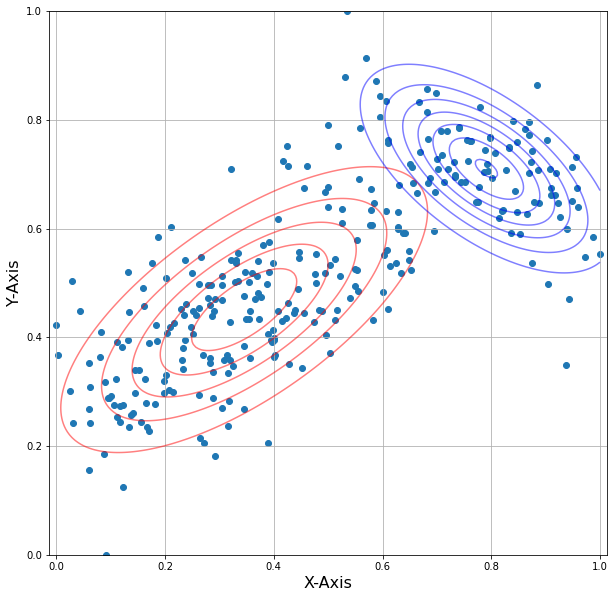

Iteration 71: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.29545641105282117
Iteration 72: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564110944222
Iteration 73: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564111258127
Iteration 74: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.295456411149

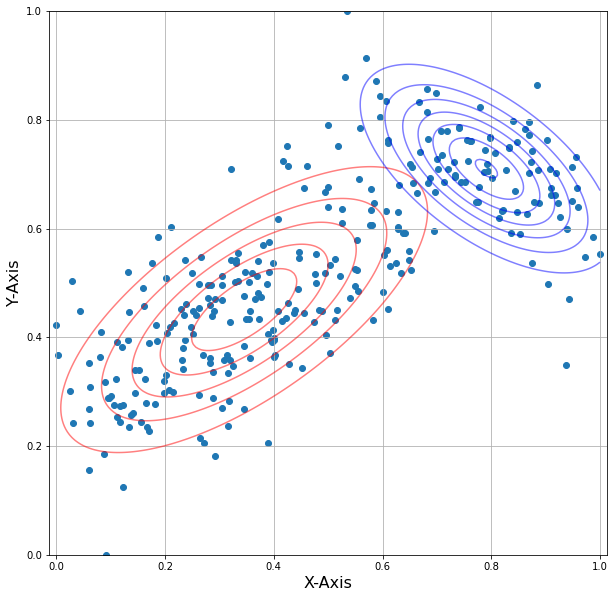

Iteration 81: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.29545641121217353
Iteration 82: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564112146626
Iteration 83: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564112165406
Iteration 84: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.295456411217

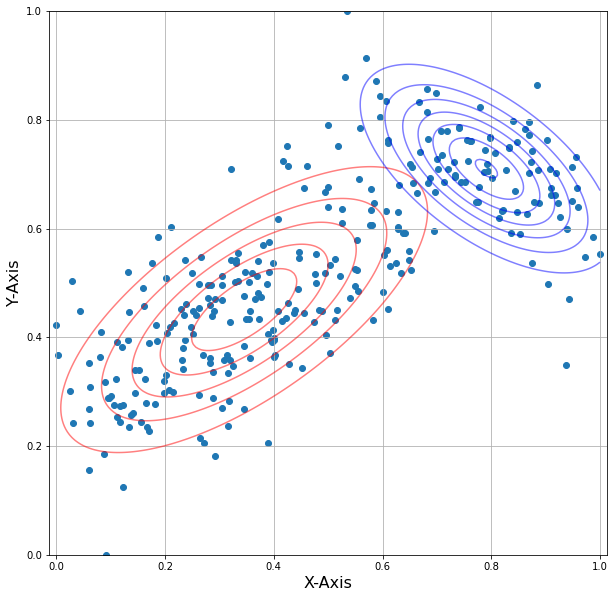

Iteration 91: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.29545641122170657
Iteration 92: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564112218553
Iteration 93: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.2954564112219675
Iteration 94: Mean Cluster 1:[0.34540504 0.45105124], Covariance 1: [[0.03244669 0.01737877]
 [0.01737877 0.0197113 ]], Mean Cluster 2:[0.79103468 0.71045718], Covariance 2:[[ 0.01373266 -0.00697906]
 [-0.00697906  0.00938369]], pi:0.295456411222

In [91]:
iterations = 100
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    print("Iteration {}: Mean Cluster 1:{}, Covariance 1: {}, Mean Cluster 2:{}, Covariance 2:{}, pi:{}".format(i,lis1[0],lis1[2],lis1[1],lis1[3],lis1[4]))
    if(i % 10 == 0):
        plot(lis1)

In [92]:
## K Means for patterns using all measurements.

In [93]:
x = df[df.columns[0:7]]
y = df[df.columns[8]]

#cols = [8]
#data.drop(data.columns[cols],axis=1,inplace=True)
data.head()
#y =  pd.DataFrame(x_scaled, column.name == Temp)

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


In [94]:
x.head()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI
0,0.904012,0.119801,0.047208,0.000000,0.000000,0.000000,0.357812
1,0.820104,0.110697,0.020728,0.003729,0.009143,0.008957,0.367547
2,0.728214,0.082351,0.018069,0.006377,0.018635,0.018647,0.454420
3,0.596419,0.043037,0.007922,0.008754,0.028415,0.028498,0.525951
4,0.444996,0.000000,0.100440,0.012105,0.038269,0.037956,0.427173


In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [96]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

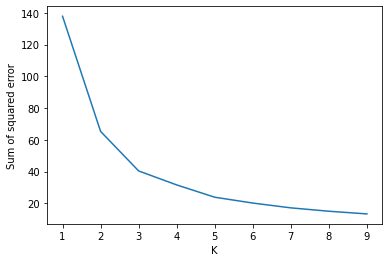

In [97]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [98]:
#cols = [8]
#df.drop(df.columns[cols],axis=1,inplace=True)

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x)
df['cluster']=y_predicted

df.head()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp,cluster
0,0.904012,0.119801,0.047208,0.000000,0.000000,0.000000,0.357812,0.573072,0.382958,0
1,0.820104,0.110697,0.020728,0.003729,0.009143,0.008957,0.367547,0.526387,0.391773,0
2,0.728214,0.082351,0.018069,0.006377,0.018635,0.018647,0.454420,0.483762,0.410382,0
3,0.596419,0.043037,0.007922,0.008754,0.028415,0.028498,0.525951,0.444520,0.448580,0
4,0.444996,0.000000,0.100440,0.012105,0.038269,0.037956,0.427173,0.407984,0.422135,0


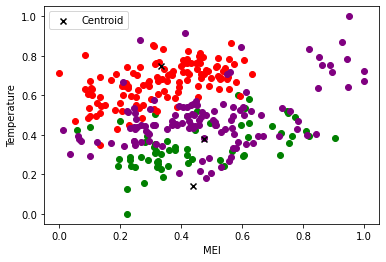

In [99]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.MEI,df1.Temp,color='green')
plt.scatter(df2.MEI,df2.Temp,color='red')
plt.scatter(df3.MEI,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('MEI')
plt.ylabel('Temperature')
plt.legend()



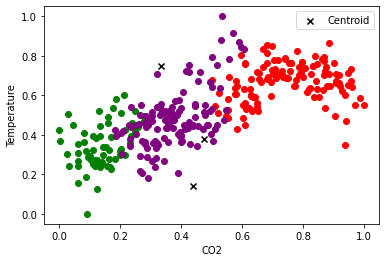

In [100]:
plt.scatter(df1.CO2,df1.Temp,color='green')
plt.scatter(df2.CO2,df2.Temp,color='red')
plt.scatter(df3.CO2,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.legend()


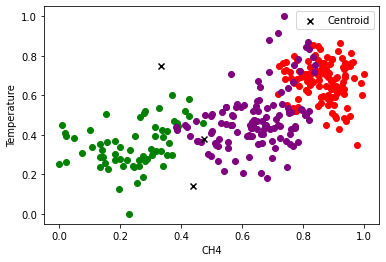

In [101]:
plt.scatter(df1.CH4,df1.Temp,color='green')
plt.scatter(df2.CH4,df2.Temp,color='red')
plt.scatter(df3.CH4,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('CH4')
plt.ylabel('Temperature')
plt.legend()


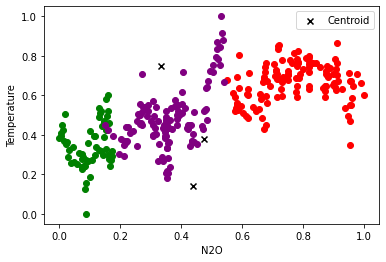

In [102]:
plt.scatter(df1.N2O,df1.Temp,color='green')
plt.scatter(df2.N2O,df2.Temp,color='red')
plt.scatter(df3.N2O,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('N2O')
plt.ylabel('Temperature')
plt.legend()


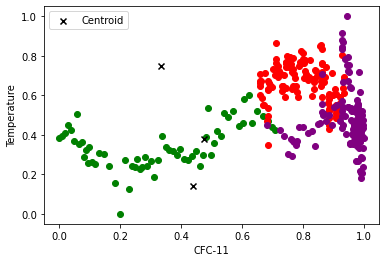

In [103]:
plt.scatter(df1.CFC11,df1.Temp,color='green')
plt.scatter(df2.CFC11,df2.Temp,color='red')
plt.scatter(df3.CFC11,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('CFC-11')
plt.ylabel('Temperature')
plt.legend()

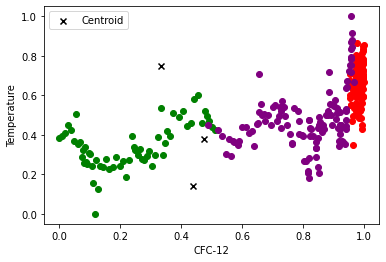

In [104]:
plt.scatter(df1.CFC12,df1.Temp,color='green')
plt.scatter(df2.CFC12,df2.Temp,color='red')
plt.scatter(df3.CFC12,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('CFC-12')
plt.ylabel('Temperature')
plt.legend()

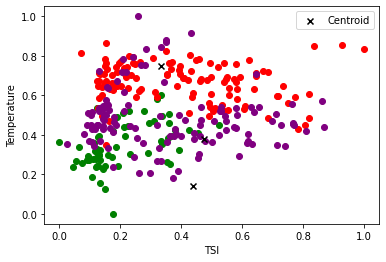

In [105]:
plt.scatter(df1.TSI,df1.Temp,color='green')
plt.scatter(df2.TSI,df2.Temp,color='red')
plt.scatter(df3.TSI,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('TSI')
plt.ylabel('Temperature')
plt.legend()

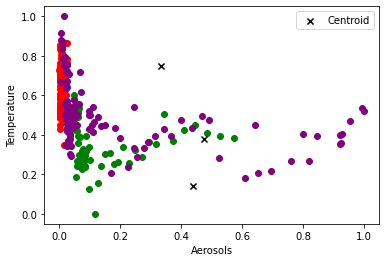

In [106]:
plt.scatter(df1.Aerosols,df1.Temp,color='green')
plt.scatter(df2.Aerosols,df2.Temp,color='red')
plt.scatter(df3.Aerosols,df3.Temp,color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('Aerosols')
plt.ylabel('Temperature')
plt.legend()

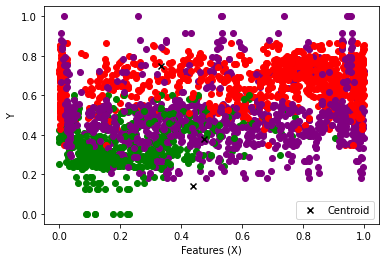

In [107]:
plt.scatter(df1.MEI,df1.Temp,color='green')
plt.scatter(df2.MEI,df2.Temp,color='red')
plt.scatter(df3.MEI,df3.Temp,color='purple')

plt.scatter(df1.CO2,df1.Temp,color='green')
plt.scatter(df2.CO2,df2.Temp,color='red')
plt.scatter(df3.CO2,df3.Temp,color='purple')

plt.scatter(df1.CH4,df1.Temp,color='green')
plt.scatter(df2.CH4,df2.Temp,color='red')
plt.scatter(df3.CH4,df3.Temp,color='purple')

plt.scatter(df1.N2O,df1.Temp,color='green')
plt.scatter(df2.N2O,df2.Temp,color='red')
plt.scatter(df3.N2O,df3.Temp,color='purple')

plt.scatter(df1.CFC11,df1.Temp,color='green')
plt.scatter(df2.CFC11,df2.Temp,color='red')
plt.scatter(df3.CFC11,df3.Temp,color='purple')

plt.scatter(df1.CFC12,df1.Temp,color='green')
plt.scatter(df2.CFC12,df2.Temp,color='red')
plt.scatter(df3.CFC12,df3.Temp,color='purple')

plt.scatter(df1.TSI,df1.Temp,color='green')
plt.scatter(df2.TSI,df2.Temp,color='red')
plt.scatter(df3.TSI,df3.Temp,color='purple')

plt.scatter(df1.Aerosols,df1.Temp,color='green')
plt.scatter(df2.Aerosols,df2.Temp,color='red')
plt.scatter(df3.Aerosols,df3.Temp,color='purple')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='Centroid')
plt.xlabel('Features (X)')
plt.ylabel('Y')
plt.legend()

In [108]:
## Neural Net for predicting Temperature

In [109]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [110]:

y = y_backup
y.head()



0    0.109
1    0.118
2    0.137
3    0.176
4    0.149
Name: Temp, dtype: float64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)
x.head()


,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI
0,0.904012,0.119801,0.047208,0.000000,0.000000,0.000000,0.357812
1,0.820104,0.110697,0.020728,0.003729,0.009143,0.008957,0.367547
2,0.728214,0.082351,0.018069,0.006377,0.018635,0.018647,0.454420
3,0.596419,0.043037,0.007922,0.008754,0.028415,0.028498,0.525951
4,0.444996,0.000000,0.100440,0.012105,0.038269,0.037956,0.427173


In [112]:
np.random.seed(0)
temperature = MLPRegressor(hidden_layer_sizes=(10), max_iter=300000000)
temperature.fit(X_train,y_train.values)
temperature.score(X_test,y_test)

0.653098902048532

In [113]:
data.head()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


Results for PCA
------------------
Explained Variance:[0.30940474 0.07230542 0.04659999 0.03153672 0.02294654 0.00311016
 0.00129537]
Components:[[ 0.04434204 -0.43235337 -0.44012718 -0.47218491 -0.32071929 -0.5233474
  -0.05973421  0.11879513]
 [ 0.36425129 -0.29625211  0.03692771 -0.30010718  0.57657762  0.20880975
   0.38834497  0.40158763]
 [-0.66510889 -0.11514602 -0.0195732  -0.10311328  0.05836566 -0.02716681
   0.67264261 -0.27706215]
 [ 0.22720233  0.28024113 -0.02480872  0.31808357 -0.47653    -0.14277601
   0.54906218  0.46809857]
 [-0.60794582 -0.00845335  0.05756585  0.02645042  0.07389671  0.03737023
  -0.30246111  0.72662025]
 [-0.03967637  0.46103446 -0.83296061  0.01538535  0.26990522  0.13765323
   0.00146534  0.00367909]
 [-0.00206126 -0.64129658 -0.32677085  0.54458831 -0.14971161  0.40315552
  -0.01463447 -0.01472181]]
PCA:0.6185631675824901
PCA:0.6980313032298793
Results for ICA
------------------
Kurtosis:[-1.47698106 -0.49403059  1.38230256 -0.49996873 10.190578

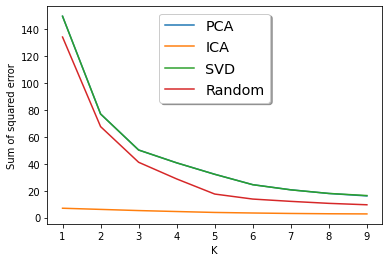

In [114]:
# In here, I run each dimensionality reduction algorithm and then I run the neural net against
# the newly transformed dataset.  Then I run clustering to the transformed dataset and re-run the
# neural net.

from sklearn import random_projection 
from sklearn.decomposition import PCA,TruncatedSVD,FastICA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import offsetbox
%matplotlib inline

DR = ['PCA', 'ICA', 'SVD', 'Random']
#DR = ['SVD']
results_dr = []
final_results = []

#3 clusters, 6 components
clusters = 2
comps = 7

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)


for dimensionality_reduction in DR:
    x = data
    min_max_scaler = preprocessing.MinMaxScaler()
    x = min_max_scaler.fit_transform(x)    
    
    np.random.seed(0)
    if dimensionality_reduction == 'Random':
        transformer = random_projection.SparseRandomProjection(n_components=comps)
        x = transformer.fit_transform(x)
        
    if dimensionality_reduction == 'PCA':
        pca = PCA(n_components=comps)
        x = pca.fit_transform(x)
        print("Results for PCA")
        print("------------------")
        print("Explained Variance:{}".format(pca.explained_variance_))
        print("Components:{}".format(pca.components_))
        
    if dimensionality_reduction =='ICA':
        transformer = FastICA(n_components=comps,max_iter=300000000, random_state=0)
        x = transformer.fit_transform(x)
        from scipy.stats import norm, kurtosis
        print("Results for ICA")
        print("------------------")
        print("Kurtosis:{}".format(kurtosis(x)))
    if dimensionality_reduction =='SVD':
        svd = TruncatedSVD(n_components = comps)
        x = svd.fit(x).transform(x)
 
    #Fit a neural net after dimensionality reduction
    np.random.seed(0)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
    temperature = MLPRegressor(hidden_layer_sizes=(10), max_iter=300000000)
    temperature.fit(x_train,y_train)
    dr_score = temperature.score(x_test,y_test)
    print("{}:{}".format(dimensionality_reduction,dr_score))
    results_dr.append(dr_score)

    sse = []
    k_rng = range(1,10)
    for k in k_rng:
        km = KMeans(n_clusters=k)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.plot(k_rng,sse, label=dimensionality_reduction)
    plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    
    km = KMeans(n_clusters=clusters)
    y_predicted = km.fit_predict(x)
    
    x_clustered = pd.DataFrame(x)
    x_clustered['cluster']=y_predicted
    
    
    #Use cluster + dimensionality reduction to fit a neural network classifier
    np.random.seed(0)
    x_train, x_test, y_train, y_test = train_test_split(x_clustered,y,test_size=0.2, random_state=0)
    temperature = MLPRegressor(hidden_layer_sizes=(10), max_iter=300000000)
    temperature.fit(x_train,y_train)
    final_score = temperature.score(x_test,y_test)
    print("{}:{}".format(dimensionality_reduction,final_score))
    final_results.append(final_score)

In [67]:
results_dr

[0.48092789118799173,
 0.36845132074991505,
 0.49370860042388265,
 -0.38830190300787515]

In [68]:
final_results

[0.7348665630450126,
 0.6403932484147347,
 0.6964034052494464,
 0.4007015162787628]

In [70]:
x_clustered.head()

,0,1,2,3,4,5,6,cluster
0,-0.333607,-0.046144,0.030008,0.364278,-0.136832,0.197438,0.076153,0
1,-0.317176,-0.059560,0.004041,0.340296,-0.100850,0.218088,0.070366,0
2,-0.352689,-0.044914,-0.008160,0.319360,-0.018659,0.273317,0.052347,0
3,-0.366718,-0.027886,-0.025576,0.300677,0.051710,0.323724,0.027357,0
4,-0.335381,0.056151,0.023087,0.283465,0.012397,0.199996,0.000000,0
